# Métodos para buscar raíces

## Método de bisección 
Para aplicar este método consideremos tres sucesiones $a_n \le p_n \le b_n$ definidas por las siguientes relaciones

$$ p_n = \frac{a_n+b_n}{2},
\quad a_{n+1} = \begin{cases}
a_n & \mbox{si } f(a_n)\cdot f(p_n) <0 \\
p_n & \mbox{si } f(a_n)\cdot f(p_n) > 0\end{cases},
\quad b_{n+1} = \begin{cases}
b_n & \mbox{si } f(b_n)\cdot f(p_n) < 0 \\
p_n & \mbox{si } f(b_n)\cdot f(p_n) > 0\end{cases}$$

Donde los valores iniciales vienen dados por:

$$a_0 := a, \quad b_0 := b.$$

Se puede probrar que las tres sucesiones convergen al valor de la única raíz del intervalo:

$$ \lim_{n \to \infty} a_n = \lim_{n \to \infty} p_n = \lim_{n \to \infty} b_n.$$

### Ejemplo método de bisección

Para la función $f(x) = x^3-x-2$

In [1]:
function biseccion(a,b)
    p = (a+b)/2
    f(x) = x^3-x-2
    for i in 1:50
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

In [2]:
biseccion(0,2)

(1.5213797068045674, -1.3322676295501878e-15)

# Graficación usando matplotlib

## Graficas usando PyPlot: Ejemplo 1

In [3]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [4]:
using PyPlot

In [11]:
x=linspace(-10,10,1000);
y=cos.(x);

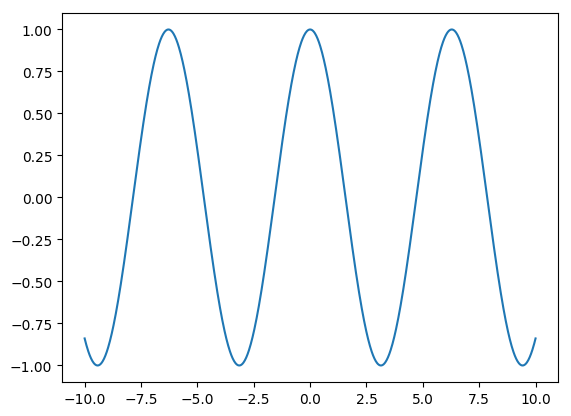

In [12]:
plot(x,y); # la sintaxis es muy parecida a matlab

* matplotlib brinda mas opciones:

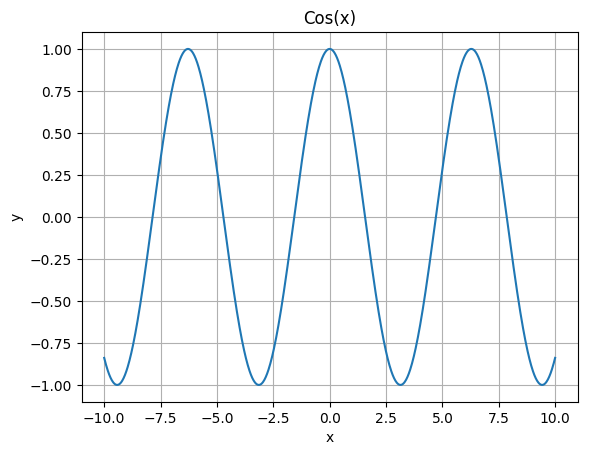

In [8]:
xlabel("x")
ylabel("y")
title("Cos(x)")
grid("on")
plot(x,y);

## Graficas usando PyPlot: Ejemplo 2

En este ejemplo se muestra como converge el metodo de los babilonios a la raiz cuadrada deseada.

In [13]:
list=zeros(30);
S=10000;
x=0.0001;
for i in 1:30
    x=0.5(x+S/x);
    list[i]=x;
end

In [14]:
x=linspace(0,30,100);
y=sqrt(S)*ones(length(x));

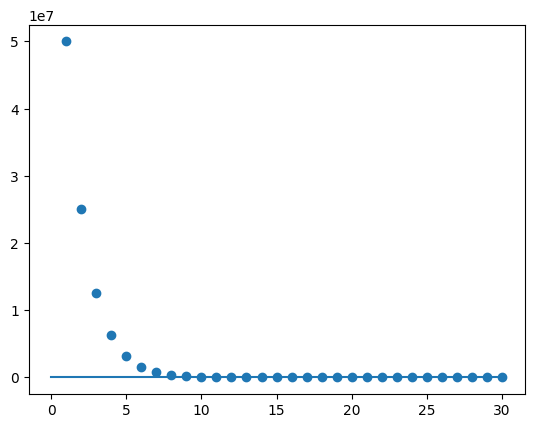

In [16]:
scatter(1:30,list);
plot(x,y);
#xlim(0,30);

## Graficas usando PyPlot: Ejemplo 3

Gráfica que muestra las intersecciones de $x \tan(x)$ y $\sqrt(A-x^2)$

In [22]:
x=linspace(-10,10,10000);
y1=sqrt.(complex(100.0-x.^2 ));
y2=x.*tan.(x);
y3=y2-y1;

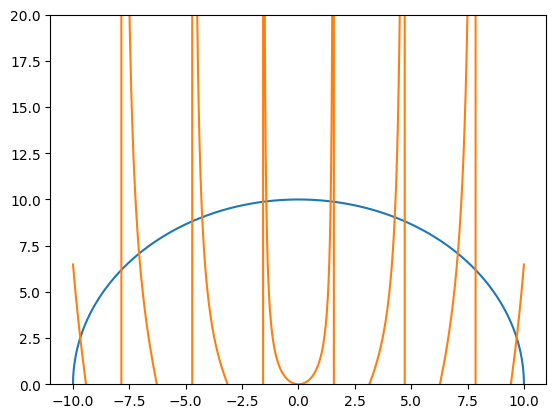

In [24]:
plot(x,y1)
plot(x,y2)
ylim(0,20)
show();

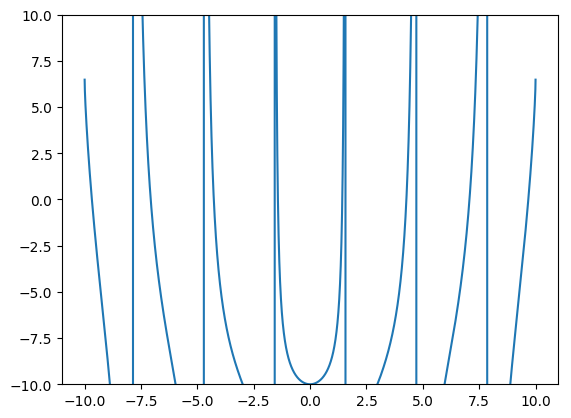

In [25]:
plot(x,y3)
ylim(-10,10)
show()

## Graficas usando PyPlot: Ejemplo 4

In [28]:
"""
Calcula las raices para el pozo finito con A=10.0
"""
function raices_pozo_finito(init)
    list=zeros(Complex64,100);
    x=init;
    for i in 1:100
        f= complex(x*tan(x)-sqrt(complex(10-x^2)))
        df=complex(x*sec(x)^2+x/sqrt(complex(10.0-x^2))+tan(x)) # Esto lo hice para evitar errores de dominio
        x=x-f/df;
        list[i]=x;
    end
    return list
end;

In [29]:
list1=raices_pozo_finito(0.1);
list2=raices_pozo_finito(1.1);
list3=raices_pozo_finito(1.5);
list4=raices_pozo_finito(3.5);

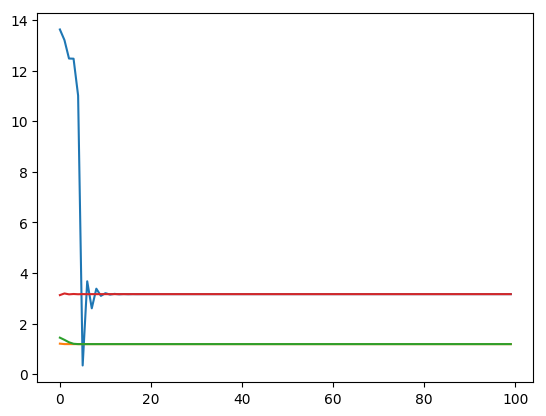

In [30]:
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

# Usando Julia como CAS llamando a SymPy

Si todavia no contamos con la libreria en nuestra biblioteca, podemos añadirla haciendo:

In [31]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [32]:
using SymPy

Primero definimos las variables simbólicas que vamos a usar:

In [35]:
A,x,a,n,m=symbols("A,x,a,n,m")

(A, x, a, n, m)

In [36]:
typeof(n)

SymPy.Sym

Evaluando la suma sugerida en el exámen

In [40]:
summation(a^n,(n,0,oo))

/   1                 
| ------   for |a| < 1
| -a + 1              
|                     
|  oo                 
< ___                 
| \  `                
|  \    n   otherwise 
|  /   a              
| /__,                
\n = 0                

## Cálculo

In [43]:
integrate(x,(x,0,1))

1/2

In [46]:
diff(sin(x),x)

cos(x)

In [ ]:
typeof(ans)

Si $x$ es simbólica y llamamos al $\sin$, Julia autómaticamente usa la función apropiada:

In [54]:
?SymPy.sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

`sin`: a SymPy function. The SymPy documentation can be found through: http://docs.sympy.org/latest/search.html?q=sin


La función que tenian que derivar a mano para el ejercicio del método de Newton-Raphson

In [55]:
f=simplify(diff(x*tan(x)-sqrt(A-x^2),x))

   x           x              
------- + ----------- + tan(x)
   2         ________         
cos (x)     /      2          
          \/  A - x           

## Conversión de funciones

In [56]:
f2=subs(f,A=>10.0)

   x             x                 
------- + ---------------- + tan(x)
   2         _____________         
cos (x)     /    2                 
          \/  - x  + 10.0          

Lo que pasa si evaluamos en otra variable simbólica:

In [57]:
f2(n)

   n             n                 
------- + ---------------- + tan(n)
   2         _____________         
cos (n)     /    2                 
          \/  - n  + 10.0          

Uno puede evaluar directamente la función en un valor númerico, sin embargo el _output_ sigue siendo un objeto simbólico:

In [65]:
f2(0.1)

0.232979976586117

In [59]:
typeof(ans)

SymPy.Sym

Como convertir números de _SymPy_ a flotantes:

In [66]:
N(ans)

0.2329799765861167

In [67]:
typeof(ans)

Float64

Podemos pasar el resultado a otra función y se sigue tratando como un objeto simbólico:

In [69]:
cos(PI)

-1

In [68]:
cos(f2(0.1))

0.972982705126180

Con la función _lambify_ podemos convertir una función de SymPy directamente en una función de Julia,típicamente hacer esto nos permite hacer rutinas mas eficientes:

In [70]:
@show f2

f2 = x/cos(x)^2 + x/sqrt(-x^2 + 10.0) + tan(x)


   x             x                 
------- + ---------------- + tan(x)
   2         _____________         
cos (x)     /    2                 
          \/  - x  + 10.0          

In [72]:
fjulia=lambdify(f2,[x]);

In [73]:
fjulia(0.1) #recordar que viene de una derivada

0.23297997658611666

In [74]:
typeof(ans)

Float64

Podemos comprobar que todo salio bien haciendo la derivada númerica:

In [75]:
function ff(x)
    A=10.0
    return  x*tan(x)-sqrt(A-x^2)
end

ff (generic function with 1 method)

In [77]:
(ff(0.1+0.00001)-ff(0.1))/0.00001

0.23299176210578307

Si queremos convertir funciones de Julia en funciones de SymPy, podemos hacer los siguiente:

Primero definimos una función en Julia:

In [87]:
function r(x)
   return x^2 
end;

Luego, como ya definimos $x$ como una variable simbólica, simplemente evaluamos nuestra función en dicha variable:

In [92]:
r(x)

 2
x 

In [80]:
typeof(ans)

SymPy.Sym

Ya podemos, por ejemplo, derivar sin problema:

In [81]:
diff(r(x),x)

2*x

In [82]:
diff(cos(r(x)),x)

        / 2\
-2*x*sin\x /

# Evaluación de funciones sobre vectores e intervalos

Ya se comentó en la clase anterior que para pasar arreglos u otros objetos como los que construimos con _range_ y _linspace_ a una función, típicamente bastaba con hacer `f(x)` donde $x$ es un arreglo, sin embargo la versión más reciente de Julia nos pide que lo escribamos como `f.(x)`. Por ej: `cos.(x)`.

Recordemos la función rango:

In [93]:
typeof(1:3)

UnitRange{Int64}

Podemos pedir el rango a pasos diferentes:

In [94]:
a=1:0.02:3
typeof(a)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [95]:
b=linspace(1.0,3.0,101)
typeof(b)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [96]:
a==b

true

In [97]:
last(a)

3.0

In [98]:
last(b)

3.0

In [99]:
length(b)

101

Evaluamos ahora la función que definimos arriba en un intervalo:

In [101]:
ff(x)

              _____________
             /    2        
x*tan(x) - \/  - x  + 10.0 

In [102]:
ff.(linspace(0.0,1.0,100))

100-element Array{Float64,1}:
 -3.16228
 -3.16216
 -3.1618 
 -3.16121
 -3.16039
 -3.15932
 -3.15802
 -3.15648
 -3.1547 
 -3.15268
 -3.15043
 -3.14793
 -3.14519
  ⋮      
 -1.93985
 -1.90128
 -1.86155
 -1.82062
 -1.77842
 -1.73491
 -1.69002
 -1.6437 
 -1.59587
 -1.54646
 -1.49539
 -1.44259

In [124]:
t=[]

0-element Array{Any,1}

In [127]:
push!(t,PI)

3-element Array{Any,1}:
  8
  9
 pi

In [120]:
t

5-element Array{Any,1}:
 2
 8
 8
 8
 6

# Ejercicio/Tarea 4 Jueves 31 de Agosto: Asesoria Martes 29 de Agosto de 7 a 8am.

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.
    * Hacer lo mismo usando el método de bisección.
    
2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`. Es muy probable que funcione llamando la funcion que crearon como `metodo_newton.(f,df,x)`.
    * Crear la misma rutina, pero que esta vez solo reciba intervalos y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$.
    * Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo) inicial. Si se complica hacerlo con arreglos `linspace` como condición inicial, basta con hacerlo para flotantes.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        
__Nota:__ Se resolveran dudas de esta tarea el Martes 29, así que traten de avanzar para que surjan dudas.

# Tarea 5 para el Martes 29 de Agosto

1. Hacer un notebook en su repositorio de Tareas que contenga una breve explicación de como funcionan los siguientes métodos de integración:

* Método de integración de Riemann, es decír, tomando la definición de integral de Riemann con diferencias finitas.
* Regla del trapecio.
* Regla de Simpson de orden 2, es decir, interpolando con polinomios de orden 2.

Pueden consultar Wikipedia.

Usen celdas de _markdown_, recuerden que pueden usar código $\LaTeX$.

__Nota:__ Se darán puntos extra a las tres personas que nos expliquen cada método de integración.

# Tarea 6 Viernes 1ro de Septiembre: Asesoria el Jueves 31 de 8 a 9am

En el mismo notebook de la tarea anterior:

Implementar los métodos mencionados en Julia, en el caso de Riemann la rutina tiene que llevar como _input_ los límites y el ancho de los rectangulos que se usarán para aproximar la integral.